# Finetuning with layer 4 unfrozen

## Finetune basemodel(lr=0.0005) for 40 epochs, lr=0.0001

In [ ]:
%run setup.ipynb
import numpy as np
import matplotlib.pyplot as plt
# load in the basemodel (trained while frozen)
model, info = load_function("base_lr0.0005.tar")

#unfreeze layer 4
unfreeze_layer4(model)

# set learning rate (same optimiser)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

epochs = 40


In [5]:
# begin finetuning!
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/40
----------
Train Loss: 0.0336 Acc: 0.9964
Val Loss: 0.0285 Acc: 1.0000
Epoch time 0m 41s
----------

Epoch 2/40
----------
Train Loss: 0.0073 Acc: 0.9988
Val Loss: 0.0284 Acc: 0.9904
Epoch time 0m 39s
----------

Epoch 3/40
----------
Train Loss: 0.0032 Acc: 0.9988
Val Loss: 0.0253 Acc: 1.0000
Epoch time 0m 40s
----------

Epoch 4/40
----------
Train Loss: 0.0017 Acc: 1.0000
Val Loss: 0.0170 Acc: 0.9904
Epoch time 0m 44s
----------

Epoch 5/40
----------
Train Loss: 0.0015 Acc: 1.0000
Val Loss: 0.0205 Acc: 0.9904
Epoch time 0m 44s
----------

Epoch 6/40
----------
Train Loss: 0.0031 Acc: 1.0000
Val Loss: 0.0387 Acc: 0.9712
Epoch time 0m 47s
----------

Epoch 7/40
----------
Train Loss: 0.0037 Acc: 0.9988
Val Loss: 0.0200 Acc: 0.9904
Epoch time 0m 43s
----------

Epoch 8/40
----------
Train Loss: 0.0098 Acc: 0.9964
Val Loss: 0.0403 Acc: 0.9808
Epoch time 0m 42s
----------

Epoch 9/40
----------
Train Loss: 0.0014 Acc: 1.0000
Val Loss: 0.0173 Acc: 1.0000
Epoch time 0m 42s
----

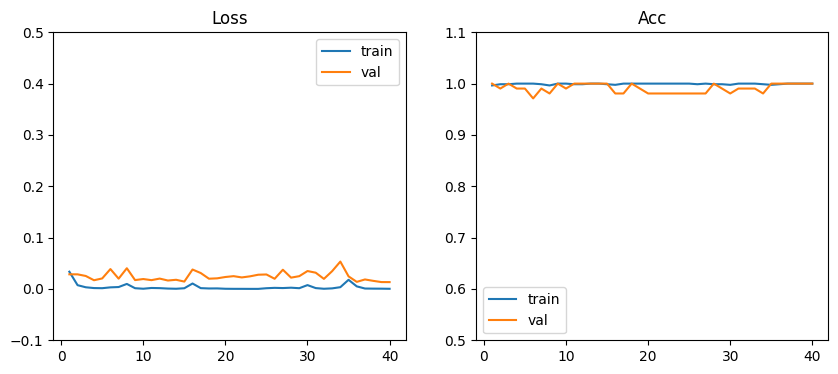

In [46]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_title("Loss")
ax1.plot(np.arange(1, 41), info["train_loss"], '-', label="train")
ax1.plot(np.arange(1, 41), info["val_loss"], '-', label="val")
ax1.set_ylim(-0.1,0.5)
ax1.legend()
ax2.set_title("Acc")
ax2.set_ylim(0.5, 1.1)
ax2.plot(np.arange(1, 41), info["train_acc"], '-', label="train")
ax2.plot(np.arange(1, 41), info["val_acc"], '-', label="val")
ax2.legend()

In [41]:
truel, predl = labels_and_predictions(dataloader_test, model, device)

In [43]:
accuracy(truel,predl)

96.19047619047619

## Finetune basemodel(lr=0.0005) for 20 epochs, lr=0.0005

In [47]:
# load in the basemodel (trained while frozen)
model0005, info0005 = load_function("base_lr0.0005.tar")

#unfreeze layer 4
unfreeze_layer4(model)

# set learning rate (same optimiser)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)

epochs = 20

# begin finetuning
model0005, info0005 = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/20
----------
Train Loss: 0.0254 Acc: 0.9952
Val Loss: 0.2284 Acc: 0.9712
Epoch time 0m 44s
----------

Epoch 2/20
----------
Train Loss: 0.0118 Acc: 0.9976
Val Loss: 0.0274 Acc: 0.9904
Epoch time 0m 41s
----------

Epoch 3/20
----------
Train Loss: 0.0044 Acc: 0.9988
Val Loss: 0.0155 Acc: 0.9904
Epoch time 0m 42s
----------

Epoch 4/20
----------
Train Loss: 0.0173 Acc: 0.9952
Val Loss: 0.0061 Acc: 1.0000
Epoch time 0m 46s
----------

Epoch 5/20
----------
Train Loss: 0.0146 Acc: 0.9976
Val Loss: 0.1252 Acc: 0.9423
Epoch time 0m 45s
----------

Epoch 6/20
----------
Train Loss: 0.0047 Acc: 0.9988
Val Loss: 0.0162 Acc: 0.9904
Epoch time 0m 45s
----------

Epoch 7/20
----------
Train Loss: 0.0368 Acc: 0.9892
Val Loss: 0.0405 Acc: 0.9808
Epoch time 0m 46s
----------

Epoch 8/20
----------
Train Loss: 0.0133 Acc: 0.9964
Val Loss: 0.0609 Acc: 0.9808
Epoch time 0m 44s
----------

Epoch 9/20
----------
Train Loss: 0.0035 Acc: 1.0000
Val Loss: 0.0364 Acc: 0.9808
Epoch time 0m 47s
----

In [49]:
_, predl0005 = labels_and_predictions(dataloader_test, model0005, device)
accuracy(truel,predl0005)

99.04761904761905

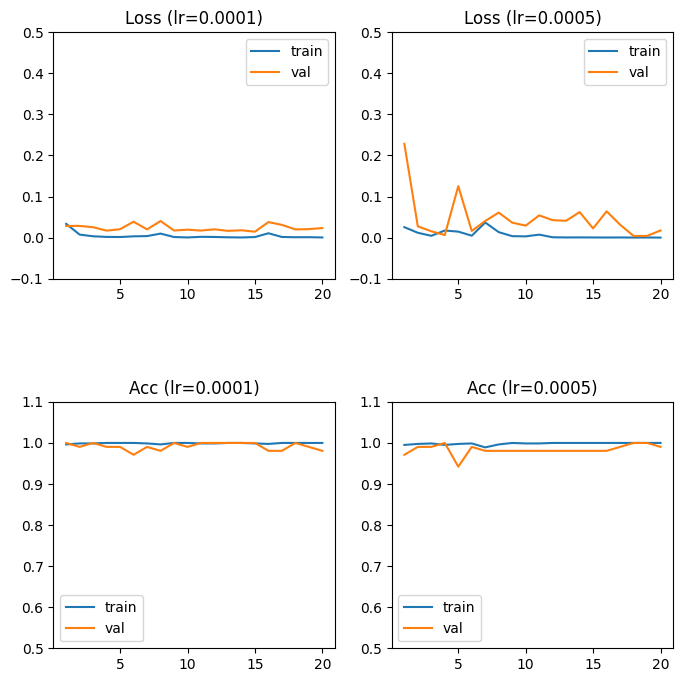

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

def plot_loss(title, info, ax):
    ax.set_title(title)
    ax.plot(np.arange(1, 21), info["train_loss"][0:20], '-', label="train")
    ax.plot(np.arange(1, 21), info["val_loss"][0:20], '-', label="val")
    ax.set_ylim(-0.1,0.5)
    ax.legend()
def plot_acc(title, info, ax):
    ax.set_title(title)
    ax.plot(np.arange(1, 21), info["train_acc"][0:20], '-', label="train")
    ax.plot(np.arange(1, 21), info["val_acc"][0:20], '-', label="val")
    ax.set_ylim(0.5,1.1)
    ax.legend()


axs = axs.ravel()
plot_loss("Loss (lr=0.0001)", info, axs[0])
plot_loss("Loss (lr=0.0005)", info0005, axs[1])
plot_acc("Acc (lr=0.0001)", info, axs[2])
plot_acc("Acc (lr=0.0005)", info0005, axs[3])

In [70]:
print(str(accuracy(truel=truel,predl=predl)))
print(str(accuracy(truel=truel,predl=predl0005)))

96.19047619047619
99.04761904761905


## Finetune basemodel(lr=0.0005) for 40 epochs, lr=0.0005

In [71]:
# load in the basemodel (trained while frozen)
model0005e40, info0005e40 = load_function("base_lr0.0005.tar")

#unfreeze layer 4
unfreeze_layer4(model)

# set learning rate (same optimiser)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)

epochs = 40

# begin finetuning
model0005e40, info0005e40 = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/40
----------
Train Loss: 0.0306 Acc: 0.9952
Val Loss: 0.0221 Acc: 0.9904
Epoch time 0m 45s
----------

Epoch 2/40
----------
Train Loss: 0.0178 Acc: 0.9964
Val Loss: 0.1033 Acc: 0.9808
Epoch time 0m 43s
----------

Epoch 3/40
----------
Train Loss: 0.0012 Acc: 1.0000
Val Loss: 0.0997 Acc: 0.9808
Epoch time 0m 42s
----------

Epoch 4/40
----------
Train Loss: 0.0005 Acc: 1.0000
Val Loss: 0.0919 Acc: 0.9904
Epoch time 0m 46s
----------

Epoch 5/40
----------
Train Loss: 0.0040 Acc: 0.9976
Val Loss: 0.0355 Acc: 0.9904
Epoch time 0m 44s
----------

Epoch 6/40
----------
Train Loss: 0.0006 Acc: 1.0000
Val Loss: 0.0369 Acc: 0.9904
Epoch time 0m 43s
----------

Epoch 7/40
----------
Train Loss: 0.0002 Acc: 1.0000
Val Loss: 0.0373 Acc: 0.9904
Epoch time 0m 46s
----------

Epoch 8/40
----------
Train Loss: 0.0037 Acc: 0.9988
Val Loss: 0.0744 Acc: 0.9904
Epoch time 0m 45s
----------

Epoch 9/40
----------
Train Loss: 0.0015 Acc: 1.0000
Val Loss: 0.1035 Acc: 0.9904
Epoch time 0m 46s
----

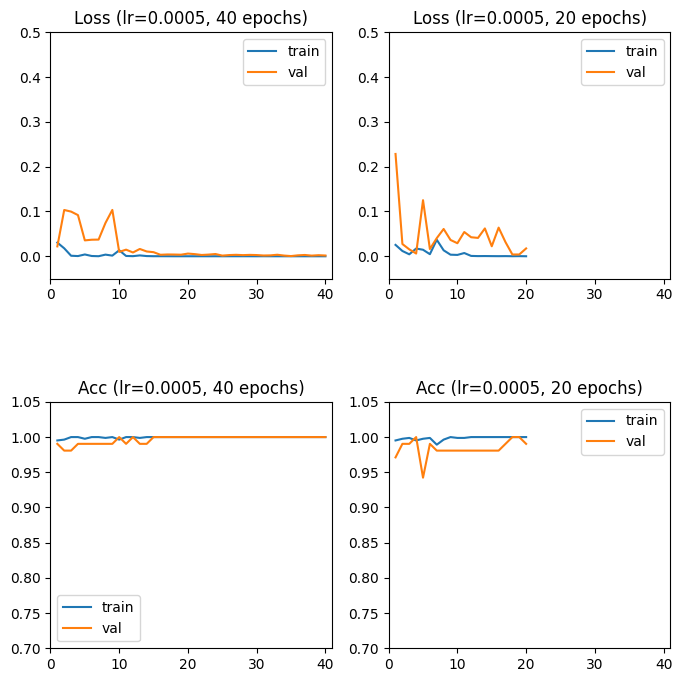

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
axs[0].set_title("Loss (lr=0.0005, 40 epochs)")
axs[0].plot(np.arange(1, 41), info0005e40["train_loss"], '-', label="train")
axs[0].plot(np.arange(1, 41), info0005e40["val_loss"], '-', label="val")
axs[1].set_title("Loss (lr=0.0005, 20 epochs)")
axs[1].plot(np.arange(1, 21), info0005["train_loss"], '-', label="train")
axs[1].plot(np.arange(1, 21), info0005["val_loss"], '-', label="val")
axs[2].set_title("Acc (lr=0.0005, 40 epochs)")
axs[2].plot(np.arange(1, 41), info0005e40["train_acc"], '-', label="train")
axs[2].plot(np.arange(1, 41), info0005e40["val_acc"], '-', label="val")
axs[3].set_title("Acc (lr=0.0005, 20 epochs)")
axs[3].plot(np.arange(1, 21), info0005["train_acc"], '-', label="train")
axs[3].plot(np.arange(1, 21), info0005["val_acc"], '-', label="val")

for ax in axs:
    ax.set_xlim(0,41)
    ax.legend()

for ax in (axs[0],axs[1]):
    ax.set_ylim(-0.05,0.5)
for ax in (axs[2],axs[3]):
    ax.set_ylim(0.7,1.05)

In [81]:
truel0005e40, predl0005e40 = labels_and_predictions(dataloader_test, model0005e40, device)
base, baseinfo = load_function("base_lr0.0005.tar")
truelbase, predlbase = labels_and_predictions(dataloader_test, base, device)
print("Accuracy lr=0.0001 (40 epochs) {:.4f}".format(accuracy(truel, predl)))
print("Accuracy lr=0.0005 (20 epochs) {:.4f}".format(accuracy(truel, predl0005)))
print("Accuracy lr=0.0005 (40 epochs) {:.4f}".format(accuracy(truel, predl0005e40)))
print("Accuracy with no finetuning {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy with no finetuning {:.4f}".format(accuracy(truelbase, predlbase)))

Accuracy lr=0.0001 (40 epochs) 96.1905
Accuracy lr=0.0005 (20 epochs) 99.0476
Accuracy lr=0.0005 (40 epochs) 98.0952
Accuracy with no finetuning 97.1429
Accuracy with no finetuning 64.7619


In [85]:
save_function("fine0.0001_e40.tar", model, info, extra_info={"test_acc": accuracy(truel, predl), "finetuning":"lr=0.0001, 40 epochs","optimizer": "Adam with lr=0.0005"})
save_function("fine0.0005_e20.tar", model0005, info0005, extra_info={"test_acc": accuracy(truel, predl0005), "finetuning":"lr=0.0005, 20 epochs","optimizer": "Adam with lr=0.0005"})
save_function("fine0.0005_e40.tar", model0005e40, info0005e40, extra_info={"test_acc": accuracy(truel, predl0005e40), "finetuning":"lr=0.0005, 40 epochs","optimizer": "Adam with lr=0.0005"})

## Finetune basemodel(lr=0.0005) for 20 epochs, lr=0.0005, with weight decay

In [92]:
0.0005/10 == 0.00005 # i do not trust myself 

True

In [93]:
# load in the basemodel (trained while frozen)
model0005e20wd, info0005e20wd = load_function("base_lr0.0005.tar")
unfreeze_layer4(model)

epochs = 20
lr = 0.0005
wd = lr/10
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=wd)

# begin finetuning
model0005e20wd, info0005e20wd = train_model(model0005e20wd, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/20
----------
Train Loss: 0.0538 Acc: 0.9988
Val Loss: 0.0971 Acc: 0.9808
Epoch time 0m 58s
----------

Epoch 2/20
----------
Train Loss: 0.0501 Acc: 0.9964
Val Loss: 0.1042 Acc: 0.9904
Epoch time 1m 5s
----------

Epoch 3/20
----------
Train Loss: 0.0522 Acc: 0.9976
Val Loss: 0.1049 Acc: 0.9808
Epoch time 1m 8s
----------

Epoch 4/20
----------
Train Loss: 0.0533 Acc: 0.9976
Val Loss: 0.0951 Acc: 0.9904
Epoch time 1m 4s
----------

Epoch 5/20
----------
Train Loss: 0.0503 Acc: 0.9988
Val Loss: 0.1190 Acc: 0.9904
Epoch time 1m 2s
----------

Epoch 6/20
----------
Train Loss: 0.0465 Acc: 1.0000
Val Loss: 0.0984 Acc: 0.9904
Epoch time 1m 4s
----------

Epoch 7/20
----------
Train Loss: 0.0529 Acc: 0.9976
Val Loss: 0.1070 Acc: 0.9904
Epoch time 1m 5s
----------

Epoch 8/20
----------
Train Loss: 0.0542 Acc: 0.9976
Val Loss: 0.0939 Acc: 0.9904
Epoch time 1m 4s
----------

Epoch 9/20
----------
Train Loss: 0.0543 Acc: 0.9976
Val Loss: 0.0871 Acc: 1.0000
Epoch time 1m 4s
----------



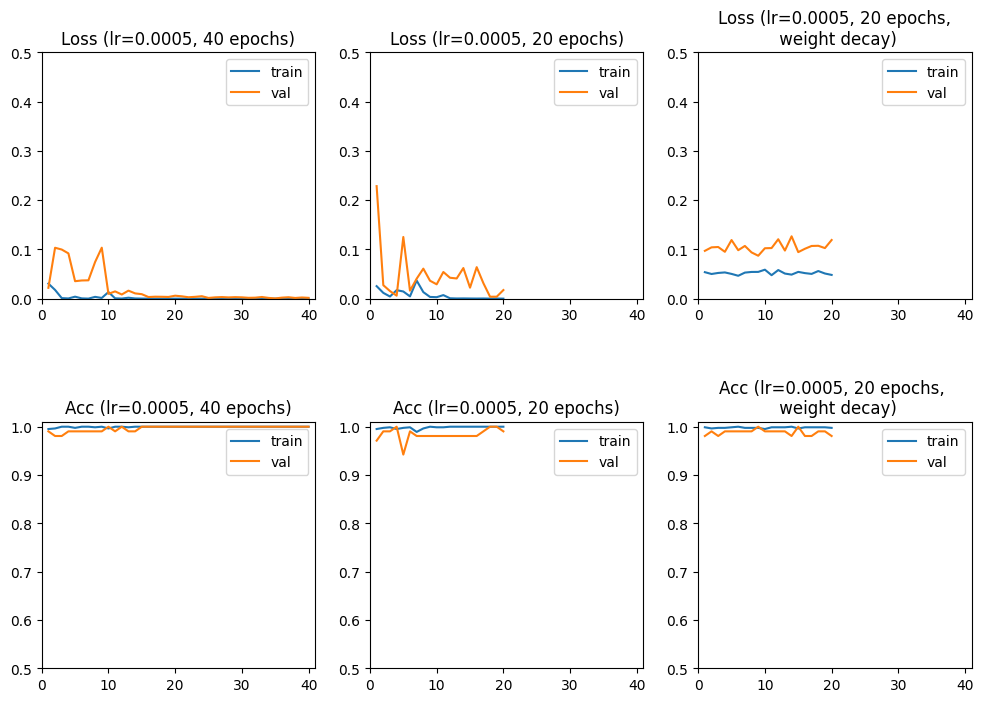

In [100]:
fig, axs = plt.subplots(2, 3, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)

def plot_loss(title, info, ax, ylim_top=0.5, ylim_bot=0, xlim_top=41, xlim_bot=0):
    train = info["train_loss"]
    val = info["val_loss"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()

def plot_acc(title, info, ax, ylim_top=1.01, ylim_bot=0.5, xlim_top=41, xlim_bot=0):
    train = info["train_acc"]
    val = info["val_acc"]
    ax.set_title(title)
    ax.plot(np.arange(1, len(train)+1), train, '-', label="train")
    ax.plot(np.arange(1, len(val)+1), val, '-', label="val")
    ax.set_ylim(ylim_bot, ylim_top)
    ax.set_xlim(xlim_bot,xlim_top)
    ax.legend()


axs = axs.ravel()
plot_loss("Loss (lr=0.0005, 40 epochs)", info0005e40, axs[0])
plot_loss("Loss (lr=0.0005, 20 epochs)", info0005, axs[1])
plot_loss("Loss (lr=0.0005, 20 epochs,\n weight decay)", info0005e20wd, axs[2])
plot_acc("Acc (lr=0.0005, 40 epochs)", info0005e40, axs[3])
plot_acc("Acc (lr=0.0005, 20 epochs)", info0005, axs[4])
plot_acc("Acc (lr=0.0005, 20 epochs, \n weight decay)", info0005e20wd, axs[5])

In [102]:
truel0005e20wd, predl0005e20wd = labels_and_predictions(dataloader_test, model0005e20wd, device)
print("Accuracy with no finetuning {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy lr=0.0001 (40 epochs) {:.4f}".format(accuracy(truel, predl)))
print("Accuracy lr=0.0005 (40 epochs) {:.4f}".format(accuracy(truel, predl0005e40)))
print("Accuracy lr=0.0005 (20 epochs) {:.4f}".format(accuracy(truel, predl0005)))
print("Accuracy lr=0.0005 (20 epochs) with weight decay {:.4f}".format(accuracy(truel0005e20wd, predl0005e20wd)))

Accuracy with no finetuning 97.1429
Accuracy lr=0.0001 (40 epochs) 96.1905
Accuracy lr=0.0005 (40 epochs) 98.0952
Accuracy lr=0.0005 (20 epochs) 99.0476
Accuracy lr=0.0005 (20 epochs) with weight decay 97.1429


In [103]:
save_function("fine0.0005_e20_wd.tar", model0005e20wd, info0005e20wd, extra_info={"test_acc": accuracy(truel, predl0005e20wd), "finetuning":"lr=0.0005, 20 epochs, with weight decay 0.00005","optimizer": "Adam with lr=0.0005 and weight decay 0.00005"})


## Finetune basemodel(lr=0.0005) for 20 epochs, lr=0.0004 with weight_decay=0.00002

In [104]:
# load in the basemodel (trained while frozen)
model0004e20wd00002, info0004e20wd00002 = load_function("base_lr0.0005.tar")
unfreeze_layer4(model)

epochs = 20
lr = 0.0004
wd = 0.00002
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=wd)

# begin finetuning
model0004e20wd00002, info0004e20wd00002 = train_model(model0004e20wd00002, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/20
----------
Train Loss: 0.0493 Acc: 1.0000
Val Loss: 0.1159 Acc: 0.9904
Epoch time 0m 45s
----------

Epoch 2/20
----------
Train Loss: 0.0527 Acc: 0.9988
Val Loss: 0.1054 Acc: 1.0000
Epoch time 1m 1s
----------

Epoch 3/20
----------
Train Loss: 0.0490 Acc: 0.9988
Val Loss: 0.0972 Acc: 0.9904
Epoch time 0m 60s
----------

Epoch 4/20
----------
Train Loss: 0.0523 Acc: 0.9976
Val Loss: 0.1026 Acc: 0.9904
Epoch time 0m 58s
----------

Epoch 5/20
----------
Train Loss: 0.0509 Acc: 0.9988
Val Loss: 0.1005 Acc: 0.9904
Epoch time 0m 56s
----------

Epoch 6/20
----------
Train Loss: 0.0482 Acc: 0.9988
Val Loss: 0.1075 Acc: 0.9904
Epoch time 0m 59s
----------

Epoch 7/20
----------
Train Loss: 0.0543 Acc: 0.9988
Val Loss: 0.0903 Acc: 0.9904
Epoch time 0m 56s
----------

Epoch 8/20
----------
Train Loss: 0.0482 Acc: 0.9988
Val Loss: 0.1174 Acc: 0.9904
Epoch time 0m 53s
----------

Epoch 9/20
----------
Train Loss: 0.0490 Acc: 1.0000
Val Loss: 0.1005 Acc: 1.0000
Epoch time 0m 53s
-----

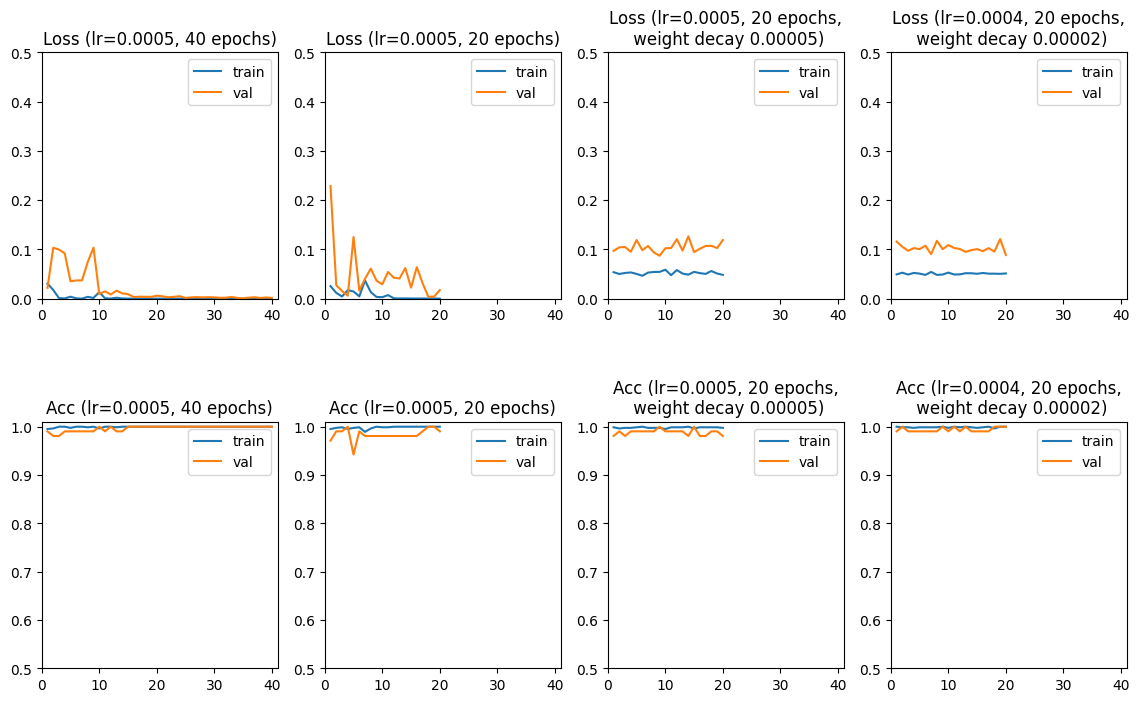

In [106]:
fig, axs = plt.subplots(2, 4, figsize=(14,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (lr=0.0005, 40 epochs)", info0005e40, axs[0])
plot_loss("Loss (lr=0.0005, 20 epochs)", info0005, axs[1])
plot_loss("Loss (lr=0.0005, 20 epochs,\n weight decay 0.00005)", info0005e20wd, axs[2])
plot_loss("Loss (lr=0.0004, 20 epochs,\n weight decay 0.00002)", info0004e20wd00002, axs[3])
plot_acc("Acc (lr=0.0005, 40 epochs)", info0005e40, axs[4])
plot_acc("Acc (lr=0.0005, 20 epochs)", info0005, axs[5])
plot_acc("Acc (lr=0.0005, 20 epochs,\n weight decay 0.00005)", info0005e20wd, axs[6])
plot_acc("Acc (lr=0.0004, 20 epochs,\n weight decay 0.00002)", info0004e20wd00002, axs[7])

In [108]:
truel0004e20wd00002, predl0004e20wd00002 = labels_and_predictions(dataloader_test, model0004e20wd00002, device)
print("Accuracy with no finetuning: {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy lr=0.0001 (40 epochs): {:.4f}".format(accuracy(truel, predl)))
print("Accuracy lr=0.0005 (40 epochs): {:.4f}".format(accuracy(truel, predl0005e40)))
print("Accuracy lr=0.0005 (20 epochs): {:.4f}".format(accuracy(truel, predl0005)))
print("Accuracy lr=0.0005 (20 epochs) with weight decay 0.00005: {:.4f}".format(accuracy(truel0005e20wd, predl0005e20wd)))
print("Accuracy lr=0.0004 (20 epochs) with weight decay 0.00002: {:.4f}".format(accuracy(truel0004e20wd00002, predl0004e20wd00002)))

Accuracy with no finetuning: 97.1429
Accuracy lr=0.0001 (40 epochs): 96.1905
Accuracy lr=0.0005 (40 epochs): 98.0952
Accuracy lr=0.0005 (20 epochs): 99.0476
Accuracy lr=0.0005 (20 epochs) with weight decay 0.00005: 97.1429
Accuracy lr=0.0004 (20 epochs) with weight decay 0.00002: 96.1905


In [109]:
# load in the basemodel (trained while frozen)
model0003e20, info0003e20 = load_function("base_lr0.0005.tar")
unfreeze_layer4(model)

epochs = 20
lr = 0.0003
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)

# begin finetuning
model0003e20, info0003e20 = train_model(model0003e20, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/20
----------
Train Loss: 0.0504 Acc: 0.9988
Val Loss: 0.0942 Acc: 1.0000
Epoch time 0m 37s
----------

Epoch 2/20
----------
Train Loss: 0.0468 Acc: 0.9988
Val Loss: 0.0986 Acc: 0.9904
Epoch time 0m 36s
----------

Epoch 3/20
----------
Train Loss: 0.0515 Acc: 1.0000
Val Loss: 0.1093 Acc: 0.9904
Epoch time 0m 35s
----------

Epoch 4/20
----------
Train Loss: 0.0568 Acc: 0.9964
Val Loss: 0.1010 Acc: 1.0000
Epoch time 0m 37s
----------

Epoch 5/20
----------
Train Loss: 0.0588 Acc: 0.9976
Val Loss: 0.0956 Acc: 0.9904
Epoch time 0m 38s
----------

Epoch 6/20
----------
Train Loss: 0.0527 Acc: 0.9988
Val Loss: 0.1335 Acc: 0.9808
Epoch time 0m 37s
----------

Epoch 7/20
----------
Train Loss: 0.0482 Acc: 0.9976
Val Loss: 0.1096 Acc: 0.9904
Epoch time 0m 37s
----------

Epoch 8/20
----------
Train Loss: 0.0536 Acc: 0.9964
Val Loss: 0.1001 Acc: 0.9904
Epoch time 0m 38s
----------

Epoch 9/20
----------
Train Loss: 0.0520 Acc: 0.9952
Val Loss: 0.1015 Acc: 0.9904
Epoch time 0m 39s
----

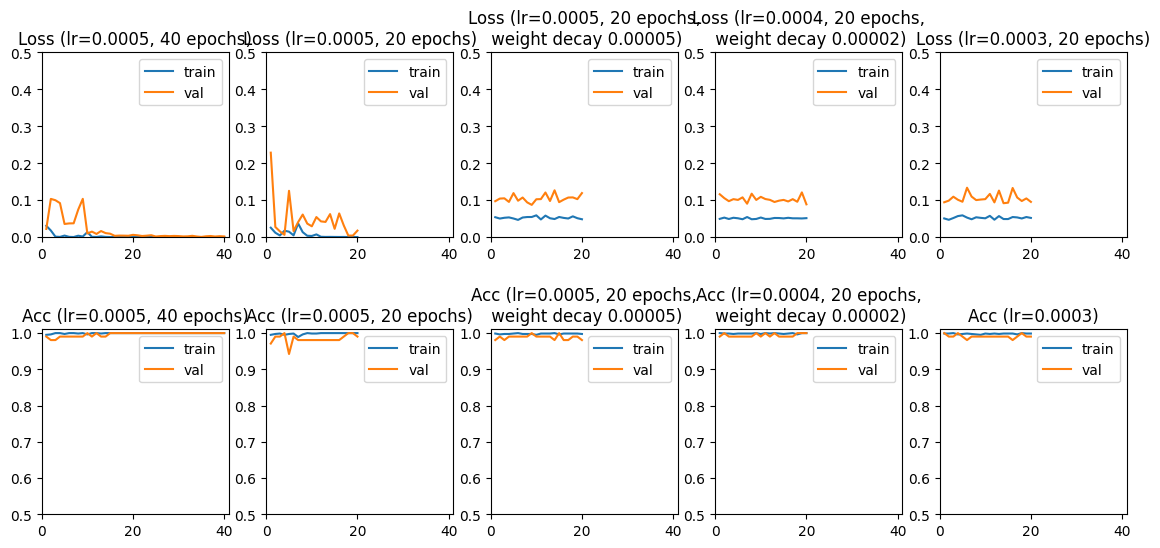

In [110]:
fig, axs = plt.subplots(2, 5, figsize=(14,6))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (lr=0.0005, 40 epochs)", info0005e40, axs[0])
plot_loss("Loss (lr=0.0005, 20 epochs)", info0005, axs[1])
plot_loss("Loss (lr=0.0005, 20 epochs,\n weight decay 0.00005)", info0005e20wd, axs[2])
plot_loss("Loss (lr=0.0004, 20 epochs,\n weight decay 0.00002)", info0004e20wd00002, axs[3])
plot_loss("Loss (lr=0.0003, 20 epochs)", info0003e20, axs[4])
plot_acc("Acc (lr=0.0005, 40 epochs)", info0005e40, axs[5])
plot_acc("Acc (lr=0.0005, 20 epochs)", info0005, axs[6])
plot_acc("Acc (lr=0.0005, 20 epochs,\n weight decay 0.00005)", info0005e20wd, axs[7])
plot_acc("Acc (lr=0.0004, 20 epochs,\n weight decay 0.00002)", info0004e20wd00002, axs[8])
plot_acc("Acc (lr=0.0003)", info0003e20, axs[9])

In [111]:
truel0003e20, predl0003e20 = labels_and_predictions(dataloader_test, model0003e20, device)
print("Accuracy with no finetuning: {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy lr=0.0001 (40 epochs): {:.4f}".format(accuracy(truel, predl)))
print("Accuracy lr=0.0005 (40 epochs): {:.4f}".format(accuracy(truel, predl0005e40)))
print("Accuracy lr=0.0005 (20 epochs): {:.4f}".format(accuracy(truel, predl0005)))
print("Accuracy lr=0.0005 (20 epochs) with weight decay 0.00005: {:.4f}".format(accuracy(truel0005e20wd, predl0005e20wd)))
print("Accuracy lr=0.0004 (20 epochs) with weight decay 0.00002: {:.4f}".format(accuracy(truel0004e20wd00002, predl0004e20wd00002)))
print("Accuracy lr=0.0003 (20 epochs): {:.4f}".format(accuracy(truel0003e20, predl0003e20)))

Accuracy with no finetuning: 97.1429
Accuracy lr=0.0001 (40 epochs): 96.1905
Accuracy lr=0.0005 (40 epochs): 98.0952
Accuracy lr=0.0005 (20 epochs): 99.0476
Accuracy lr=0.0005 (20 epochs) with weight decay 0.00005: 97.1429
Accuracy lr=0.0004 (20 epochs) with weight decay 0.00002: 96.1905
Accuracy lr=0.0003 (20 epochs): 97.1429


## UGH trying again with finetuning lr = 0.0005, 20 epochs

In [122]:
# load in the basemodel (trained while frozen)
model0005e20, info0005e20 = load_function("base_lr0.0005.tar")
unfreeze_layer4(model0005e20)

epochs = 20
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model0005e20.parameters()), lr=lr)

# begin finetuning
model0005e20, info0005e20 = train_model(model0005e20, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/20
----------
Train Loss: 0.0639 Acc: 0.9820
Val Loss: 0.0107 Acc: 1.0000
Epoch time 0m 47s
----------

Epoch 2/20
----------
Train Loss: 0.0180 Acc: 0.9928
Val Loss: 0.0082 Acc: 1.0000
Epoch time 0m 45s
----------

Epoch 3/20
----------
Train Loss: 0.0215 Acc: 0.9952
Val Loss: 0.0382 Acc: 0.9904
Epoch time 0m 46s
----------

Epoch 4/20
----------
Train Loss: 0.0072 Acc: 0.9988
Val Loss: 0.0118 Acc: 0.9904
Epoch time 0m 45s
----------

Epoch 5/20
----------
Train Loss: 0.0039 Acc: 0.9988
Val Loss: 0.0034 Acc: 1.0000
Epoch time 0m 45s
----------

Epoch 6/20
----------
Train Loss: 0.0008 Acc: 1.0000
Val Loss: 0.0036 Acc: 1.0000
Epoch time 0m 45s
----------

Epoch 7/20
----------
Train Loss: 0.0003 Acc: 1.0000
Val Loss: 0.0030 Acc: 1.0000
Epoch time 0m 46s
----------

Epoch 8/20
----------
Train Loss: 0.0002 Acc: 1.0000
Val Loss: 0.0045 Acc: 1.0000
Epoch time 0m 46s
----------

Epoch 9/20
----------
Train Loss: 0.0003 Acc: 1.0000
Val Loss: 0.0031 Acc: 1.0000
Epoch time 0m 45s
----

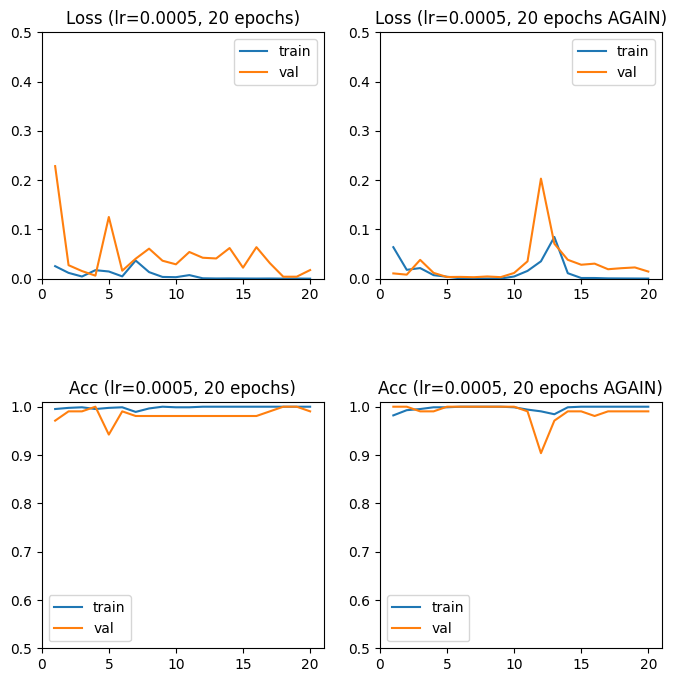

In [123]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (lr=0.0005, 20 epochs)", info0005, axs[0], xlim_top=21)
plot_loss("Loss (lr=0.0005, 20 epochs AGAIN)", info0005e20, axs[1], xlim_top=21)
plot_acc("Acc (lr=0.0005, 20 epochs)", info0005, axs[2], xlim_top=21)
plot_acc("Acc (lr=0.0005, 20 epochs AGAIN)", info0005e20, axs[3], xlim_top=21)

In [125]:
truel0005e20, predl0005e20 = labels_and_predictions(dataloader_test, model0005e20, device)
print("Accuracy with no finetuning: {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy lr=0.0001 (40 epochs): {:.4f}".format(accuracy(truel, predl))) # lmao it's worse now. Also lr was too low, nothing happened on the curves really
print("Accuracy lr=0.0005 (40 epochs): {:.4f}".format(accuracy(truel, predl0005e40))) # seems like 40 epochs was a lot more than necessary
print("Accuracy lr=0.0005 (20 epochs): {:.4f}".format(accuracy(truel, predl0005))) # ok why is on 20 epochs so erratic?
print("Accuracy lr=0.0005 (20 epochs) with weight decay 0.00005: {:.4f}".format(accuracy(truel0005e20wd, predl0005e20wd))) # try to make it less erratic with weight decay, but now it's scared to  do anything bc of penalties
print("Accuracy lr=0.0005 (20 epochs AGAIN): {:.4f}".format(accuracy(truel0005e20, predl0005e20))) # try 20 epochs again, maybe the erratic behaviour was just a one-off... okay WHAT THE HELL why is it worse now????

Accuracy with no finetuning: 97.1429
Accuracy lr=0.0001 (40 epochs): 96.1905
Accuracy lr=0.0005 (40 epochs): 98.0952
Accuracy lr=0.0005 (20 epochs): 99.0476
Accuracy lr=0.0005 (20 epochs) with weight decay 0.00005: 97.1429
Accuracy lr=0.0005 (20 epochs AGAIN): 99.0476


In [126]:
# load in the basemodel (trained while frozen)
model0005e10, info0005e10 = load_function("base_lr0.0005.tar")
unfreeze_layer4(model0005e10)

epochs = 10
lr = 0.0005
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model0005e10.parameters()), lr=lr)

# begin finetuning
model0005e10, info0005e10 = train_model(model0005e10, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/10
----------
Train Loss: 0.0821 Acc: 0.9772
Val Loss: 0.0266 Acc: 0.9904
Epoch time 0m 47s
----------

Epoch 2/10
----------
Train Loss: 0.0094 Acc: 0.9988
Val Loss: 0.0160 Acc: 1.0000
Epoch time 0m 46s
----------

Epoch 3/10
----------
Train Loss: 0.0177 Acc: 0.9940
Val Loss: 0.0109 Acc: 1.0000
Epoch time 0m 49s
----------

Epoch 4/10
----------
Train Loss: 0.0086 Acc: 0.9964
Val Loss: 0.0208 Acc: 1.0000
Epoch time 0m 50s
----------

Epoch 5/10
----------
Train Loss: 0.0058 Acc: 0.9976
Val Loss: 0.0236 Acc: 0.9904
Epoch time 0m 51s
----------

Epoch 6/10
----------
Train Loss: 0.0025 Acc: 0.9988
Val Loss: 0.0063 Acc: 1.0000
Epoch time 0m 55s
----------

Epoch 7/10
----------
Train Loss: 0.0006 Acc: 1.0000
Val Loss: 0.0137 Acc: 0.9904
Epoch time 0m 50s
----------

Epoch 8/10
----------
Train Loss: 0.0007 Acc: 1.0000
Val Loss: 0.0080 Acc: 1.0000
Epoch time 0m 52s
----------

Epoch 9/10
----------
Train Loss: 0.0008 Acc: 1.0000
Val Loss: 0.0031 Acc: 1.0000
Epoch time 0m 49s
----

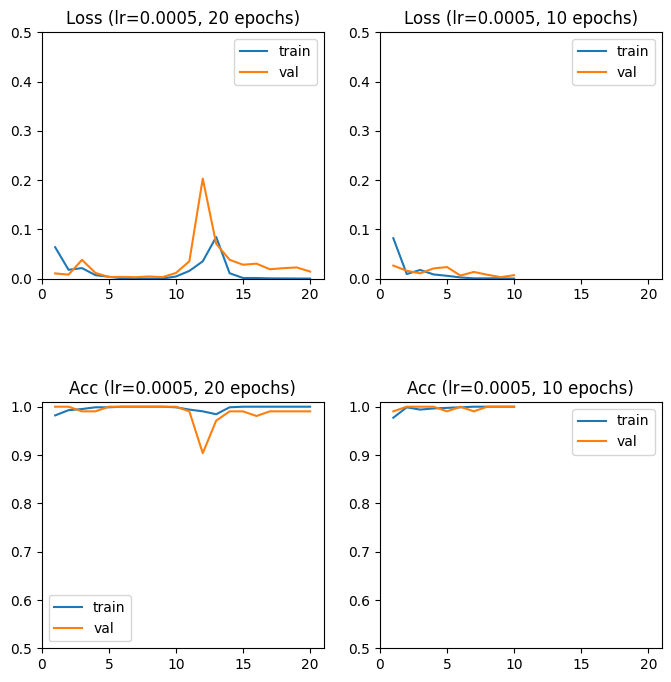

In [127]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.5)

axs = axs.ravel()
plot_loss("Loss (lr=0.0005, 20 epochs)", info0005e20, axs[0], xlim_top=21)
plot_loss("Loss (lr=0.0005, 10 epochs)", info0005e10, axs[1], xlim_top=21)
plot_acc("Acc (lr=0.0005, 20 epochs)", info0005e20, axs[2], xlim_top=21)
plot_acc("Acc (lr=0.0005, 10 epochs)", info0005e10, axs[3], xlim_top=21)

In [129]:
truel0005e10, predl0005e10 = labels_and_predictions(dataloader_test, model0005e10, device)
print("Accuracy with no finetuning: {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy lr=0.0001 (40 epochs): {:.4f}".format(accuracy(truel, predl))) # lmao it's worse now. Also lr was too low, nothing happened on the curves really
print("Accuracy lr=0.0005 (20 epochs): {:.4f}".format(accuracy(truel0005e20, predl0005e20))) 
print("Accuracy lr=0.0005 (10 epochs): {:.4f}".format(accuracy(truel0005e10, predl0005e10))) 

Accuracy with no finetuning: 97.1429
Accuracy lr=0.0001 (40 epochs): 96.1905
Accuracy lr=0.0005 (20 epochs): 99.0476
Accuracy lr=0.0005 (10 epochs): 99.0476


In [130]:
truel0005e10feeder, predl0005e10feeder = labels_and_predictions(dataloader_feeder, model0005e10, device)

In [132]:
basefeedtrue, basefeedpred = labels_and_predictions(dataloader_feeder, base, device)

In [135]:
print("Accuracy with no finetuning: {:.4f}".format(baseinfo["test_acc"]))
print("Accuracy lr=0.0005 (20 epochs): {:.4f}".format(accuracy(truel0005e20, predl0005e20))) 
print("Accuracy lr=0.0005 (10 epochs): {:.4f}".format(accuracy(truel0005e10, predl0005e10))) 

print("\nAccfeed with no finetuning: {:.4f}".format(accuracy(basefeedtrue, basefeedpred)))
print("Accfeed lr=0.0005 (10 epochs): {:.4f}".format(accuracy(truel0005e10feeder, predl0005e10feeder))) 

Accuracy with no finetuning: 97.1429
Accuracy lr=0.0005 (20 epochs): 99.0476
Accuracy lr=0.0005 (10 epochs): 99.0476

Accfeed with no finetuning: 30.4463
Accfeed lr=0.0005 (10 epochs): 58.4256


# STINNA HUSK AT AFLEVERE DINE TIMESEDLER U DUMMY

## Finetune basemodel(lr=0.0005, data=aug2) for 40 epochs, lr=?

# 28/11 work

## Unfreezing layer 4 of trained basemodel

In [2]:
model, info = load_function("basemodel.tar")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
epochs = 50
unfreeze_layer4(model)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)


Epoch 1/50
----------
Train Loss: 0.1106 Acc: 0.9641
Val Loss: 0.0183 Acc: 1.0000
Epoch time 2m 39s
----------

Epoch 2/50
----------
Train Loss: 0.0384 Acc: 0.9904
Val Loss: 0.8047 Acc: 0.9615
Epoch time 2m 38s
----------

Epoch 3/50
----------
Train Loss: 0.0429 Acc: 0.9952
Val Loss: 0.0597 Acc: 0.9712
Epoch time 2m 29s
----------

Epoch 4/50
----------
Train Loss: 0.0503 Acc: 0.9868
Val Loss: 0.0402 Acc: 0.9712
Epoch time 2m 29s
----------

Epoch 5/50
----------
Train Loss: 0.0204 Acc: 0.9928
Val Loss: 0.0227 Acc: 0.9904
Epoch time 2m 34s
----------

Epoch 6/50
----------
Train Loss: 0.0045 Acc: 1.0000
Val Loss: 0.0062 Acc: 1.0000
Epoch time 2m 38s
----------

Epoch 7/50
----------
Train Loss: 0.0014 Acc: 1.0000
Val Loss: 0.0058 Acc: 1.0000
Epoch time 2m 31s
----------

Epoch 8/50
----------
Train Loss: 0.0012 Acc: 1.0000
Val Loss: 0.0119 Acc: 0.9904
Epoch time 2m 31s
----------

Epoch 9/50
----------
Train Loss: 0.0004 Acc: 1.0000
Val Loss: 0.0029 Acc: 1.0000
Epoch time 2m 31s
----

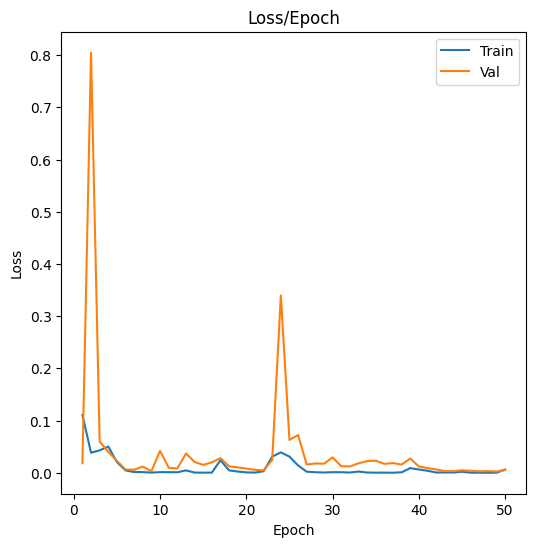

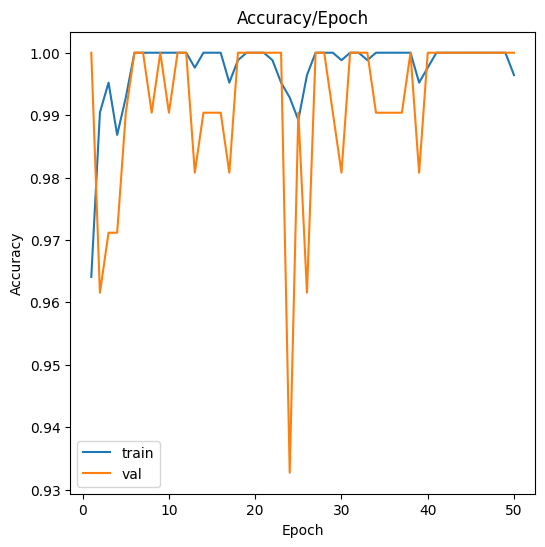

Training accuracies
[0.9640718562874252, 0.9904191616766467, 0.9952095808383233, 0.9868263473053892, 0.9928143712574851, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9976047904191617, 1.0, 1.0, 1.0, 0.9952095808383233, 0.9988023952095808, 1.0, 1.0, 1.0, 0.9988023952095808, 0.9952095808383233, 0.9928143712574851, 0.9892215568862276, 0.9964071856287425, 1.0, 1.0, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9988023952095808, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9952095808383233, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9964071856287425]
Validation Accuracies
[1.0, 0.9615384615384616, 0.9711538461538461, 0.9711538461538461, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9807692307692307, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9807692307692307, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9326923076923077, 0.9903846153846154, 0.9615384615384616, 1.0, 1.0, 0.9903846153846154, 0.9807692307692307, 1.0, 1.0, 1.0, 0.9903846153846154, 0.990384615

In [6]:
plot_loss(info["train_loss"], info["val_loss"])
plot_accuracies(info["train_acc"], info["val_acc"], ["train", "val"])
print_stats(info)

In [8]:
truel, predl = labels_and_predictions(dataloader_test, model, device)

Accuracy 98.09523809523809
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.94      1.00      0.97        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.87      0.93        15
       robin       0.94      1.00      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 13  1  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

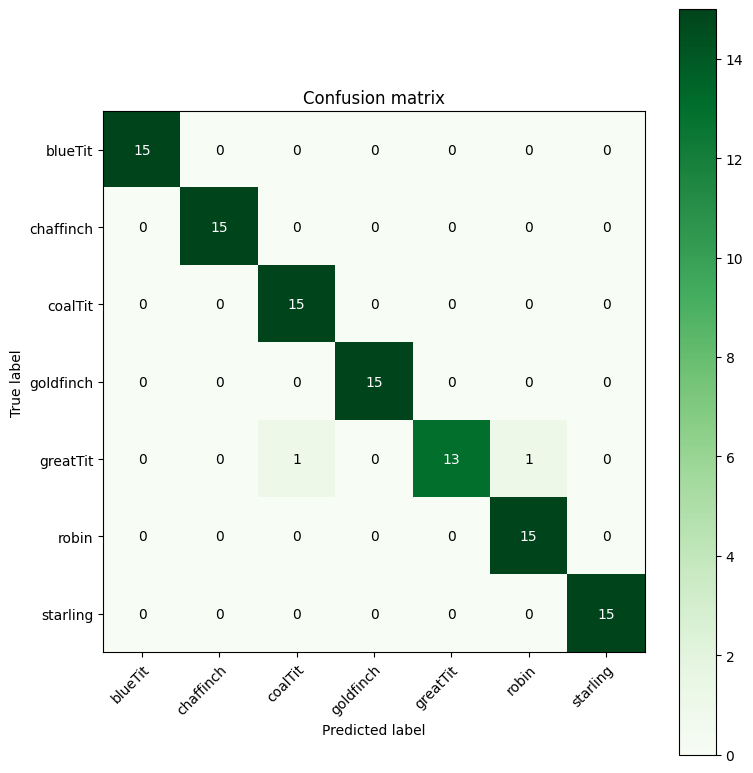

In [9]:
test_acc = (np.sum(predl==truel)/predl.size * 100)
print("Accuracy", test_acc)
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels)

In [10]:
model.eval()
feeder_truel, feeder_predl = labels_and_predictions(dataloader_feeder, model, device)

Accuracy 60.169772531334964
              precision    recall  f1-score   support

     blueTit       0.88      0.21      0.33      2078
   chaffinch       0.87      0.45      0.60      3552
     coalTit       0.66      0.70      0.68      1846
   goldfinch       0.72      0.93      0.81      2000
    greatTit       0.56      0.43      0.49      2033
       robin       0.39      0.73      0.51      1428
    starling       0.49      0.91      0.64      2142

    accuracy                           0.60     15079
   macro avg       0.65      0.62      0.58     15079
weighted avg       0.69      0.60      0.58     15079

[[ 427   61  169   93  501  295  532]
 [   2 1611   91  278   78  950  542]
 [   1  109 1295  135   91   59  156]
 [   0    7    9 1869    6  106    3]
 [  40   33  320  228  880  134  398]
 [   0    0    3    0    1 1043  381]
 [  14   32   64    7    4   73 1948]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

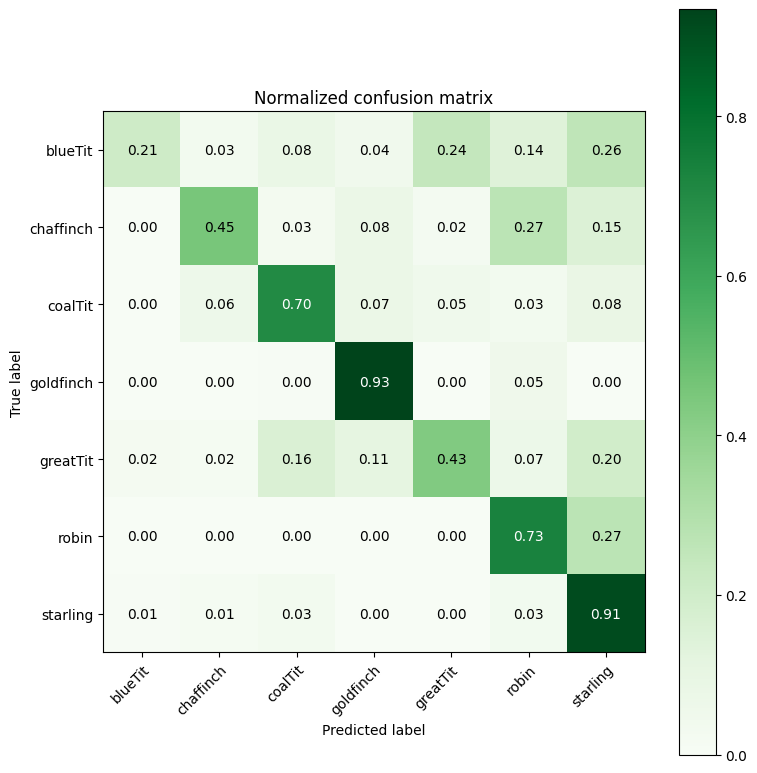

In [11]:
feeder_acc = (np.sum(feeder_predl==feeder_truel)/feeder_predl.size * 100)
print("Accuracy", feeder_acc)
print(classification_report(feeder_truel, feeder_predl, target_names=class_labels))
plot_confusion_matrix(feeder_truel, feeder_predl, class_labels, normalize=True)

In [13]:
save_function("fine_base_50_layer4.tar", model, info, extra_info={"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lambda", "note" : "layer4 unfrozen"})

## Running unfreeze layer 4 on model aug 1

In [14]:
model, info = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [15]:
unfreeze_layer4(model)
epochs=50
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/50
----------
Train Loss: 0.1357 Acc: 0.9665
Val Loss: 0.3644 Acc: 0.9038
Epoch time 2m 1s
----------

Epoch 2/50
----------
Train Loss: 0.0380 Acc: 0.9856
Val Loss: 0.0698 Acc: 0.9712
Epoch time 1m 58s
----------

Epoch 3/50
----------
Train Loss: 0.2467 Acc: 0.9868
Val Loss: 0.0917 Acc: 0.9808
Epoch time 1m 58s
----------

Epoch 4/50
----------
Train Loss: 0.0160 Acc: 0.9964
Val Loss: 0.0188 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 5/50
----------
Train Loss: 0.0044 Acc: 0.9988
Val Loss: 0.0273 Acc: 0.9904
Epoch time 1m 52s
----------

Epoch 6/50
----------
Train Loss: 0.0015 Acc: 1.0000
Val Loss: 0.0074 Acc: 1.0000
Epoch time 1m 56s
----------

Epoch 7/50
----------
Train Loss: 0.0019 Acc: 0.9988
Val Loss: 0.0046 Acc: 1.0000
Epoch time 1m 52s
----------

Epoch 8/50
----------
Train Loss: 0.0019 Acc: 1.0000
Val Loss: 0.0292 Acc: 0.9904
Epoch time 1m 59s
----------

Epoch 9/50
----------
Train Loss: 0.0012 Acc: 1.0000
Val Loss: 0.0014 Acc: 1.0000
Epoch time 1m 53s
-----

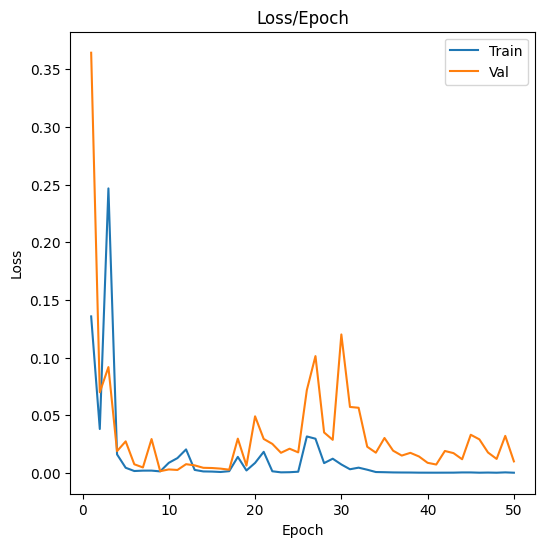

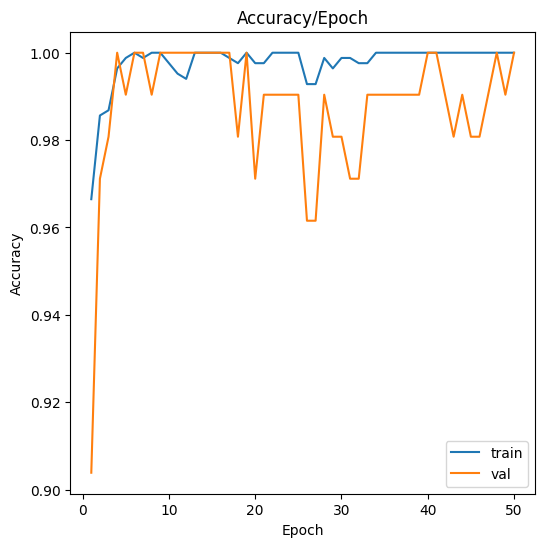

Training accuracies
[0.9664670658682635, 0.98562874251497, 0.9868263473053892, 0.9964071856287425, 0.9988023952095808, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9976047904191617, 0.9952095808383233, 0.9940119760479041, 1.0, 1.0, 1.0, 1.0, 0.9988023952095808, 0.9976047904191617, 1.0, 0.9976047904191617, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 0.9928143712574851, 0.9928143712574851, 0.9988023952095808, 0.9964071856287425, 0.9988023952095808, 0.9988023952095808, 0.9976047904191617, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracies
[0.9038461538461539, 0.9711538461538461, 0.9807692307692307, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9807692307692307, 1.0, 0.9711538461538461, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9615384615384616, 0.9615384615384616, 0.9903846153846154, 0.9807692307692307, 0.980769

In [16]:
plot_loss(info["train_loss"], info["val_loss"])
plot_accuracies(info["train_acc"], info["val_acc"], ["train", "val"])
print_stats(info)

Accuracy 96.19047619047619
              precision    recall  f1-score   support

     blueTit       0.94      1.00      0.97        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.88      0.93      0.90        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      0.87      0.93        15
       robin       0.94      1.00      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 1  0 14  0  0  0  0]
 [ 0  0  0 14  0  1  0]
 [ 0  0  2  0 13  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

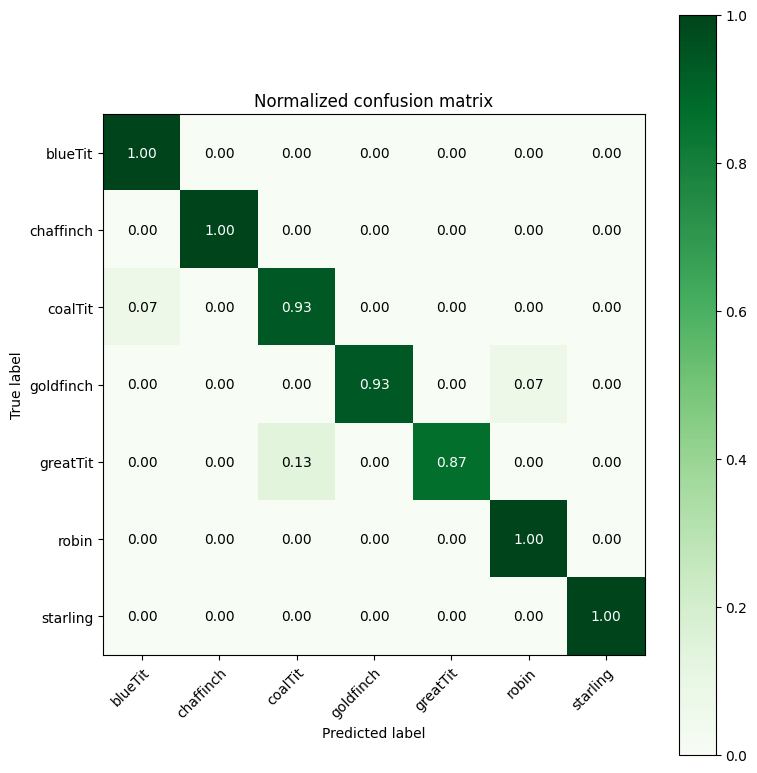

In [17]:
truel, predl = labels_and_predictions(dataloader_test, model, device)
test_acc = (np.sum(predl==truel)/predl.size * 100)
print("Accuracy", test_acc)
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels, normalize=True)

In [18]:
feeder_truel, feeder_predl = labels_and_predictions(dataloader_feeder, model, device)

Accuracy 65.60116718615294
              precision    recall  f1-score   support

     blueTit       0.45      0.66      0.54      2078
   chaffinch       0.93      0.52      0.67      3552
     coalTit       0.77      0.64      0.70      1846
   goldfinch       0.92      0.91      0.91      2000
    greatTit       0.63      0.61      0.62      2033
       robin       0.47      0.32      0.38      1428
    starling       0.55      0.92      0.69      2142

    accuracy                           0.66     15079
   macro avg       0.68      0.65      0.64     15079
weighted avg       0.71      0.66      0.66     15079

[[1377    2   28    5  511   13  142]
 [ 654 1857   23   66   99  256  597]
 [ 422   39 1182   15   78   89   21]
 [  84   21   52 1810    5   28    0]
 [ 430    1  210   10 1245   29  108]
 [  90   66    5   17   38  458  754]
 [  10    3   28   36    3   99 1963]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

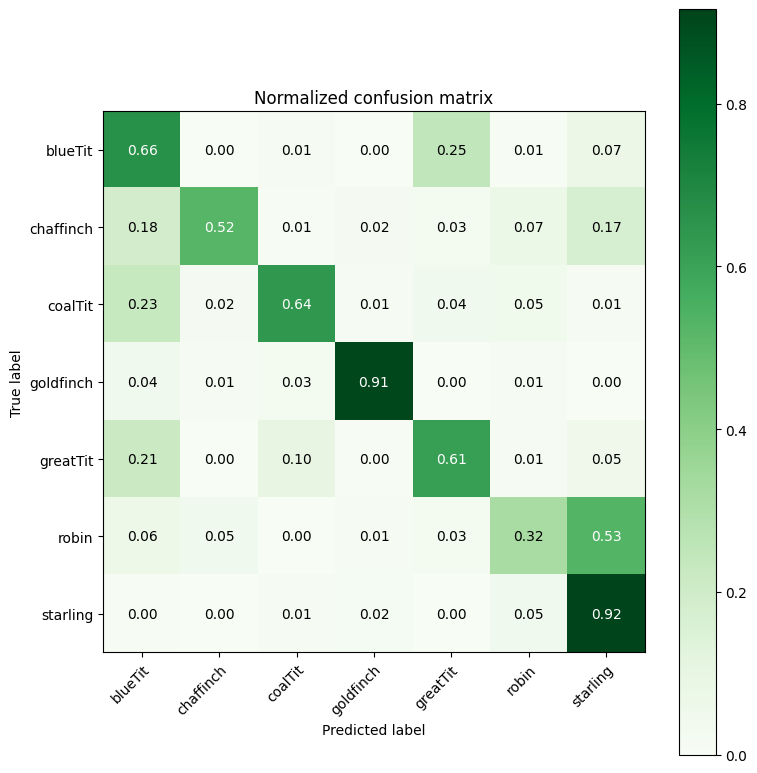

In [19]:
feeder_acc = (np.sum(feeder_predl==feeder_truel)/feeder_predl.size * 100)
print("Accuracy", feeder_acc)
print(classification_report(feeder_truel, feeder_predl, target_names=class_labels))
plot_confusion_matrix(feeder_truel, feeder_predl, class_labels, normalize=True)

In [20]:
save_function("fine_aug_50_layer4.tar", model, info, extra_info={"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lambda", "note" : "aug1, layer4 unfrozen"})

## Runnig aug2 just for kicks

In [21]:
model2, info2 = load_function("aug2Model_50.tar", model_key="aug", info_key="aug_info")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [22]:
unfreeze_layer4(model2)
epochs=30
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model2.parameters()), lr=0.001)
model2, info2 = train_model(model2, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/30
----------
Train Loss: 0.1523 Acc: 0.9605
Val Loss: 6.9858 Acc: 0.6827
Epoch time 2m 19s
----------

Epoch 2/30
----------
Train Loss: 0.0460 Acc: 0.9856
Val Loss: 0.0140 Acc: 1.0000
Epoch time 2m 3s
----------

Epoch 3/30
----------
Train Loss: 0.0141 Acc: 0.9952
Val Loss: 0.0122 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 4/30
----------
Train Loss: 0.0068 Acc: 0.9976
Val Loss: 0.0208 Acc: 0.9904
Epoch time 1m 55s
----------

Epoch 5/30
----------
Train Loss: 0.0026 Acc: 1.0000
Val Loss: 0.0042 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 6/30
----------
Train Loss: 0.0039 Acc: 0.9988
Val Loss: 0.0016 Acc: 1.0000
Epoch time 1m 52s
----------

Epoch 7/30
----------
Train Loss: 0.0009 Acc: 1.0000
Val Loss: 0.0077 Acc: 0.9904
Epoch time 1m 52s
----------

Epoch 8/30
----------
Train Loss: 0.0008 Acc: 1.0000
Val Loss: 0.0069 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 9/30
----------
Train Loss: 0.0250 Acc: 0.9928
Val Loss: 0.0739 Acc: 0.9808
Epoch time 1m 53s
-----

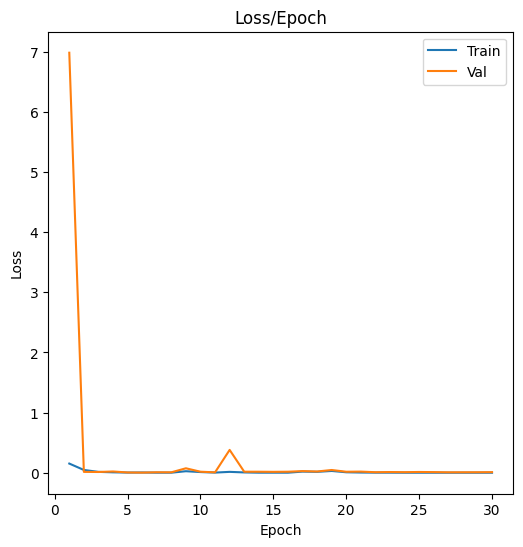

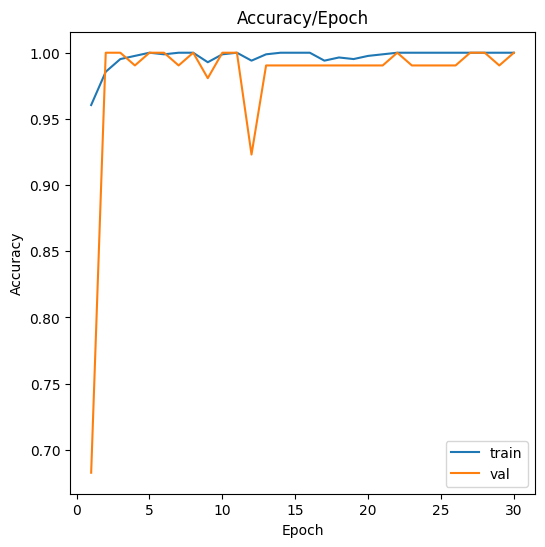

Training accuracies
[0.9604790419161676, 0.98562874251497, 0.9952095808383233, 0.9976047904191617, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9928143712574851, 0.9988023952095808, 1.0, 0.9940119760479041, 0.9988023952095808, 1.0, 1.0, 1.0, 0.9940119760479041, 0.9964071856287425, 0.9952095808383233, 0.9976047904191617, 0.9988023952095808, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracies
[0.6826923076923077, 1.0, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 0.9807692307692307, 1.0, 1.0, 0.9230769230769231, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 1.0, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0]
Validation Loss
[6.985781692541563, 0.014009027793200892, 0.012170517378273451, 0.020750774666129682, 0.004159975488549277, 0.0016250162786421312, 0.00769538943887

In [28]:
plot_loss(info2["train_loss"], info2["val_loss"])
plot_accuracies(info2["train_acc"], info2["val_acc"], ["train", "val"])
print_stats(info2)

In [24]:
truel2, predl2 = labels_and_predictions(dataloader_test, model2, device)
test_acc2 = (np.sum(predl2==truel2)/predl2.size * 100)
print("Accuracy", test_acc2)
print(classification_report(truel2, predl2, target_names=class_labels))
# plot_confusion_matrix(truel2, predl2, class_labels, normalize=True)

Accuracy 97.14285714285714
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       0.93      0.93      0.93        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      1.00      1.00        15
    starling       0.94      1.00      0.97        15

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [25]:
feeder_truel2, feeder_predl2 = labels_and_predictions(dataloader_feeder, model2, device)

Accuracy 69.44757609921083
              precision    recall  f1-score   support

     blueTit       0.71      0.35      0.47      2078
   chaffinch       0.82      0.76      0.78      3552
     coalTit       0.76      0.45      0.56      1846
   goldfinch       0.94      0.83      0.88      2000
    greatTit       0.43      0.80      0.56      2033
       robin       0.80      0.59      0.68      1428
    starling       0.68      0.98      0.81      2142

    accuracy                           0.69     15079
   macro avg       0.73      0.68      0.68     15079
weighted avg       0.74      0.69      0.69     15079

[[ 734    5    4   10 1232    4   89]
 [ 122 2687   12   41  271  181  238]
 [  85  267  827   13  471    5  178]
 [   3  238   82 1656    9    0   12]
 [  86   38  151   16 1626   10  106]
 [   0   60    0   19  157  846  346]
 [  11    0   19    3    5    8 2096]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

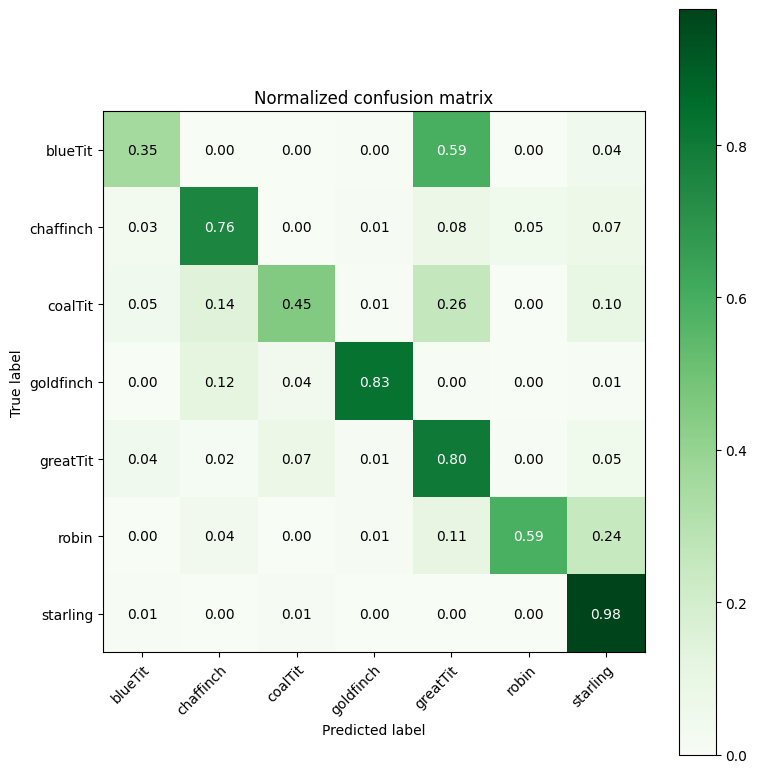

In [26]:
feeder_acc2 = (np.sum(feeder_predl2==feeder_truel2)/feeder_predl2.size * 100)
print("Accuracy", feeder_acc2)
print(classification_report(feeder_truel2, feeder_predl2, target_names=class_labels))
plot_confusion_matrix(feeder_truel2, feeder_predl2, class_labels, normalize=True)

In [27]:
save_function("fine_aug2_30_layer4.tar", model2, info2, extra_info={"test_acc": test_acc2, "feeder_acc": feeder_acc2, "optimizer": "Adam with lambda", "note" : "aug2, layer4 unfrozen"})